# fit-with-least-squares
Small project made for Modeling and Indetification class. Initially it was written
in MATLAB but in this repo is version rewritten in Python(numpy + seaborn +
pandas + matplotlib)

I haven't translate all docs and results into english but the best model and usage
can be find in .ipnb file 

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_ler = pd.read_csv("data/learning_dataset", names = ["input", "output"])

u_ler = df_ler.loc[:, "input"].values
y_ler = df_ler.loc[:, "output"].values

df_ver = pd.read_csv("data/validation_dataset", names = ["input", "output"])
u_ver = df_ver.iloc[:, 0].values
y_ver = df_ver.iloc[:, 1].values

df_ler.head(4)

,input,output
0,0.006038,-0.003411
1,0.002193,0.003513
2,-0.011439,-0.003661
3,-0.011390,0.004939


## Explanatory Data Analysis
Visualizating distibutions and realations to find any outliners

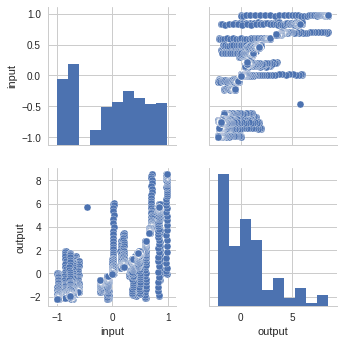

In [4]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(df_ler[["input", "output"]]);
#df_ler.head(5)
#plt.show()


## Data plotting
Dataset was divided into 2 equal-sized sets, one will be used for learning and
other for model verification.

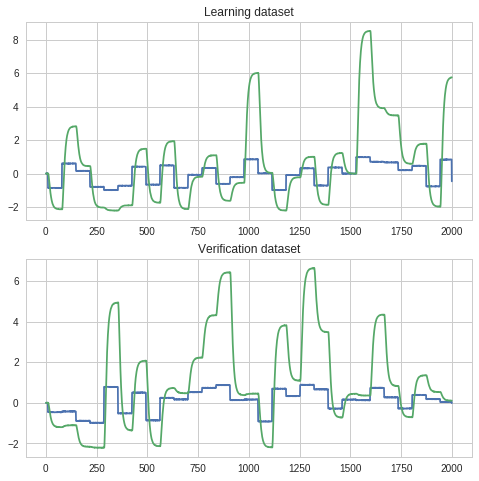

In [5]:
fig1, (ax_ler, ax_ver) = plt.subplots(2, 1, figsize=(8, 8))

ax_ler.plot(np.arange(1, u_ler.size + 1), u_ler)
ax_ler.plot(np.arange(1, u_ler.size + 1), y_ler)
ax_ler.set_title("Learning dataset")

ax_ver.plot(np.arange(1, u_ver.size + 1), u_ver)
ax_ver.plot(np.arange(1, u_ver.size + 1), y_ver)
ax_ver.set_title("Verification dataset")


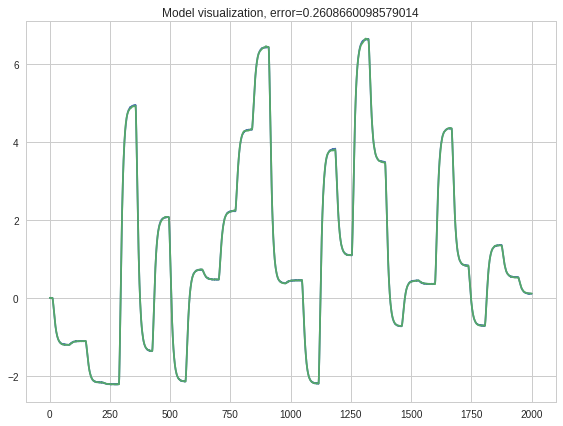

In [17]:
from model.LSM import LSM

model = LSM(u_ler, y_ler)

# model with best-found parameters
model.fit(5, 4)

y_model, y_error = model.predict(u_ver, y_ver)
data_len = len(y_model)

fig2, ax_mod = plt.subplots(1, 1, figsize=(9.5, 7))
ax_mod.plot(np.arange(1, data_len + 1), y_ver)
ax_mod.plot(np.arange(1, data_len + 1), y_model)
ax_mod.set_title("Model visualization, error={error}".format(error=y_error))